In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
import cdsapi

#import cdstoolbox as ct


In [2]:
ACCESS_CM2_1850_2014 = 'Downloads/data/ACCESS-CM2_historical_185001-201412_v20191108.nc'
ACCESS_CM2_1850_2014 = Dataset(ACCESS_CM2_1850_2014, mode='r')
print(ACCESS_CM2_1850_2014.variables.keys())
print(ACCESS_CM2_1850_2014.variables)
#x2 dimentions remove bounds
lats1 = ACCESS_CM2_1850_2014.variables["lat"][:]
lons1 = ACCESS_CM2_1850_2014.variables["lon"][:]
tas = ACCESS_CM2_1850_2014.variables["tas"][:]


dict_keys(['time', 'time_bnds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'height', 'tas'])
{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-01-01
    calendar: proleptic_gregorian
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (1980,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1980, 2)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: Latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (144,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (14

In [3]:
dates = (np.arange(tas.shape[0] ))/12.0 + 1850
print(dates)

[1850.         1850.08333333 1850.16666667 ... 2014.75       2014.83333333
 2014.91666667]


In [4]:
mask = np.logical_and( dates > 1961, dates < 1991 )
tas[tas<-500] = np.nan
base = tas[mask,:,:]
for m in range(12):
    norm = np.nanmean(base[m::12,:,:],axis=0)
    tas[m::12,:,:] = tas[m::12,:,:] - norm
tas[np.isnan(tas)] = -1.0e30

Text(0.5, 1.0, 'mean global temperature increase')

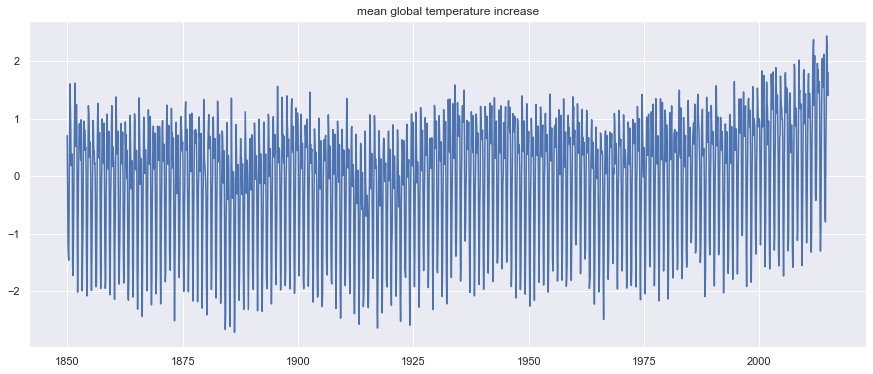

In [5]:
temp_mean = tas.mean(axis =(1,2))
avgtemp = np.average(temp_mean.reshape(-1, 12), axis=1)
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))
# Plot the responses for different events and regions
sns.lineplot(x=dates, y=temp_mean ,ax=ax)
plt.title('mean global temperature increase')


In [6]:
ACCESS_CM2_1850_2014 = 'Downloads/data/ACCESS-CM2_historical_185001-201412_v20191108.nc'
BCC_XSM2_MR_1850_2014 = 'Downloads/data/BCC-CSM2-MR_historical_85001-201412_v20181126.nc'
CanESM5_CanOE_1850_2014 ='Downloads/data/CanESM5-CanOE_historical_185001-201412_v20190429.nc'
CNRM_CM6_1850_2014 = 'Downloads/data/CNRM-CM6-1_historical_185001-201412_v20180917.nc'
GFDL_ESM4_1850_1949 = 'Downloads/data/GFDL-ESM4_historical_185001-194912_v20190726.nc'
GFDL_ESM4_1950_2014 ='Downloads/data/GFDL-ESM4_historical_195001-201412_v20190726.nc'
HadGEM_GC31_LL = 'Downloads/data/HadGEM3-GC31-LL_195001-201412_v20190624.nc'
HadGEM_GC31_LL_18500_1949='Downloads/data/HadGEM3-GC31-LL_historical_185001-194912_v20190624.nc'
KACE_18500_2014 = 'Downloads/data/KACE-1-0-G_historical_185001-201412_v20191028.nc'
MIROC6_1850_1949 = 'Downloads/data/MIROC6_historical_185001-194912_v20181212.nc'
MIROC6_1950_2014 = 'Downloads/data/MIROC6_historical_195001-201412_v20181212.nc'
UKESM1_1850_1949 = 'Downloads/data/UKESM1-0-LL_historical_185001-194912_v20190406.nc'
UKESM1_1950_2014 = 'Downloads/data/UKESM1-0-LL_historical_195001-201412_v20190406.nc'
CNRM_CM6_1850_2014 ='Downloads/data/CNRM-CM6-1-HR_185001-201412_v20191021.nc'
CESM2 = 'Downloads/data/CESM2_historical_185001-201412_v20190308.nc'
CNRM_ESM1 = 'Downloads/data/CNRM-ESM2-1_historical_185001-201412_v20181206.nc'
ACCESS_CM2_1850_2014 = Dataset(ACCESS_CM2_1850_2014, mode='r')
BCC_XSM2_MR_1850_2014 = Dataset(BCC_XSM2_MR_1850_2014, mode='r')
CanESM5_CanOE_1850_2014 = Dataset(CanESM5_CanOE_1850_2014, mode='r')
CNRM_CM6_1850_2014 = Dataset(CNRM_CM6_1850_2014, mode='r')
GFDL_ESM4_1850_1949 = Dataset(GFDL_ESM4_1850_1949, mode='r')
GFDL_ESM4_1950_2014 = Dataset(GFDL_ESM4_1950_2014, mode='r')
HadGEM_GC31_LL_1950_2014 = Dataset(HadGEM_GC31_LL, mode='r')
KACE_18500_2014 = Dataset(KACE_18500_2014, mode='r')
MIROC6_1850_1949 = Dataset(MIROC6_1850_1949, mode='r')
MIROC6_1950_2014 = Dataset(MIROC6_1950_2014, mode = 'r')
UKESM1_1850_1949 = Dataset(UKESM1_1850_1949, mode='r')
UKESM1_1950_2014 = Dataset(UKESM1_1950_2014, mode='r')
CESM2 = Dataset(CESM2, mode='r')
CNRM_ESM1 = Dataset(CNRM_ESM1, mode='r')

HadGEM_GC31_LL_18500_1949 = Dataset(HadGEM_GC31_LL_18500_1949, mode ='r')

datasets1 = [ACCESS_CM2_1850_2014,
BCC_XSM2_MR_1850_2014,
CanESM5_CanOE_1850_2014 ,
CNRM_CM6_1850_2014 ,KACE_18500_2014 , CNRM_CM6_1850_2014 , CESM2 , CNRM_ESM1]
names = ['ACCESS_CM2','BCC_XSM2_MR','CanESM5_CanOE' ,'CNRM_CM6_1850' ,'KACE' , 'CNRM_CM6' , 'CESM2' ,'CNRM_ESM1']
datasets2 =[GFDL_ESM4_1850_1949, UKESM1_1850_1949 , HadGEM_GC31_LL_18500_1949 ,MIROC6_1850_1949]
names2 = ['GFDL_ESM4','UKESM1' , 'HadGEM_GC31_LL'  , 'MIROC6']
datasets3 = [GFDL_ESM4_1950_2014, UKESM1_1950_2014 , HadGEM_GC31_LL_1950_2014 ,MIROC6_1950_2014]

In [10]:
name=0
dictionnary = dict()
for d in datasets1:
    print(names[name])
    air = d.variables['tas'][:]
    mask = np.logical_and( dates > 1961, dates < 1991 )
    air[air<-500] = np.nan
    base = air[mask,:,:]
    print(base)
    for m in range(12):
        norm = np.nanmean(base[m::12,:,:],axis=0)
        air[m::12,:,:] = air[m::12,:,:] - norm
    air[np.isnan(air)] = -1.0e30
    temp_mean = air.mean(axis =(1,2))
    dictionnary[names[name]] = temp_mean
    name+=1
    
    

ACCESS_CM2
[[[236.64893 236.67041 236.67407 ... 236.8081  236.78442 236.88892]
  [234.23584 234.21948 234.2124  ... 234.73706 234.65796 234.5044 ]
  [234.21045 234.07593 233.95312 ... 234.87402 234.66992 234.38867]
  ...
  [241.7085  241.75269 241.73657 ... 241.67163 241.65625 241.65552]
  [240.28174 240.35352 240.3645  ... 240.29248 240.26831 240.31104]
  [239.97168 239.94336 239.96777 ... 239.99536 239.93945 239.96265]]

 [[220.91528 220.83862 220.76636 ... 221.0149  221.0332  221.25317]
  [216.65454 216.771   216.67725 ... 218.18555 218.13623 217.64282]
  [217.36841 217.06079 216.73901 ... 218.89404 218.39722 217.84033]
  ...
  [238.73706 238.73193 238.90112 ... 238.5393  238.57764 238.66357]
  [239.84204 239.84595 239.93799 ... 239.45654 239.54614 239.64453]
  [240.00708 239.97974 240.02393 ... 239.94238 239.98584 240.0232 ]]

 [[209.17554 209.25879 209.21973 ... 209.6145  210.05396 210.29956]
  [201.65015 201.76929 201.75317 ... 204.07959 204.18774 203.03125]
  [205.01123 204.7224

KACE
[[[235.90015 235.88916 235.90576 ... 235.97827 235.94604 235.92676]
  [236.74829 236.62231 236.47534 ... 237.17847 237.0398  236.90161]
  [237.47021 237.23755 236.97974 ... 238.27563 238.00171 237.74731]
  ...
  [239.65112 239.64478 239.68237 ... 239.65405 239.64648 239.65991]
  [239.98096 240.02148 240.0376  ... 239.98193 239.93066 239.99292]
  [240.15991 240.1372  240.12646 ... 240.21289 240.17627 240.15869]]

 [[222.2622  222.28174 222.31567 ... 222.17358 222.18579 222.19678]
  [224.30469 224.23633 224.16528 ... 224.62866 224.51831 224.4209 ]
  [226.16724 225.99658 225.8291  ... 226.85034 226.60864 226.37695]
  ...
  [240.00977 240.06445 240.14136 ... 239.78638 239.8269  239.94458]
  [240.11816 240.14966 240.18262 ... 240.0232  240.06323 240.08057]
  [240.22583 240.25977 240.28564 ... 240.20581 240.22803 240.2124 ]]

 [[215.0791  215.12793 215.18652 ... 215.05225 215.08252 215.07642]
  [218.49951 218.39429 218.30518 ... 218.86548 218.7461  218.63135]
  [220.48901 220.34839 220.

/var/folders/54/_py3f4ks6f9d0x8d0wfy1pkc0000gn/T/ipykernel_1663/271875101.py:5: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  air = d.variables['tas'][:]


[[[232.8602  232.8602  232.8602  ... 232.8602  232.8602  232.8602 ]
  [233.96086 233.91537 233.76677 ... 233.99203 233.98582 233.97691]
  [235.05643 235.0224  235.00047 ... 235.25551 235.2175  235.15579]
  ...
  [238.45181 238.46187 238.46944 ... 238.41083 238.42467 238.43762]
  [238.47571 238.48163 238.48756 ... 238.45506 238.46304 238.46964]
  [238.4595  238.46034 238.4611  ... 238.45645 238.45758 238.45859]]

 [[220.93098 220.93098 220.93098 ... 220.93098 220.93098 220.93098]
  [221.62999 221.60828 221.47043 ... 221.60773 221.61743 221.62444]
  [222.73412 222.72055 222.72475 ... 222.88684 222.85811 222.81662]
  ...
  [251.56773 251.58559 251.60266 ... 251.51865 251.53506 251.55081]
  [251.33772 251.34753 251.35768 ... 251.30402 251.31609 251.32729]
  [251.20695 251.20764 251.20825 ... 251.2045  251.2054  251.20622]]

 [[218.92873 218.92873 218.92873 ... 218.92873 218.92873 218.92873]
  [219.19376 219.16785 219.02342 ... 219.18484 219.19151 219.19376]
  [219.62941 219.6038  219.59885

In [8]:
print(air)

[[[242.56549 242.56549 242.56549 ... 242.56549 242.56549 242.56549]
  [245.92133 245.92133 245.92133 ... 245.92133 245.92133 245.92133]
  [246.37242 246.37242 246.37242 ... 246.72656 246.37242 246.37242]
  ...
  [243.3246  243.3246  243.3246  ... 243.12292 243.3246  243.3246 ]
  [243.14268 243.14268 243.14268 ... 243.14268 243.14268 243.14268]
  [242.3829  242.3829  242.3829  ... 242.3829  242.3829  242.3829 ]]

 [[234.27895 234.27895 234.27895 ... 234.27895 234.27895 234.27895]
  [236.58481 236.58481 236.58481 ... 236.58481 236.58481 236.58481]
  [236.39737 236.39737 236.39737 ... 236.73514 236.39737 236.39737]
  ...
  [233.78368 233.78368 233.78368 ... 233.59706 233.78368 233.78368]
  [233.54965 233.54965 233.54965 ... 233.54965 233.54965 233.54965]
  [232.54503 232.54503 232.54503 ... 232.54503 232.54503 232.54503]]

 [[221.67603 221.67603 221.67603 ... 221.67603 221.67603 221.67603]
  [223.02925 223.02925 223.02925 ... 223.02925 223.02925 223.02925]
  [223.64604 223.64604 223.64604

In [ ]:
name = 0
for d1,d2 in zip(datasets2,datasets3):
    air1 = d1.variables['tas'][:]
    air2 = d2.variables['tas'][:]
    temp_mean1 = air1.mean(axis =(1,2))
    temp_mean2 = air1.mean(axis =(1,2))
    temp_mean = np.vstack((temp_mean1,temp_mean2))
    temp_mean = temp_mean.flatten() 
    temp = temp_mean[11:-1]
    avgtemp = np.average(temp.reshape(-1, 3), axis=1)
    djf_t = []
    for i in range(0,656-4-3,4):
        djf_t.append(avgtemp[i])
    print(len(djf_t))
    time3 = np.arange(1851,1949)
    dictionnary[names2[name]] = djf_t
    name+=1

In [26]:
c = 'Downloads/CRUTEM.5.0.1.0.anomalies.nc'
cr = Dataset(c, mode='r')

In [28]:
print(cr.variables)

{'tas': <class 'netCDF4._netCDF4.Variable'>
float64 tas(time, latitude, longitude)
    _FillValue: -1e+30
    standard_name: air_temperature_anomaly
    long_name: air_temperature_anomaly over land
    units: K
    cell_methods: area: mean (interval: 5.0 degrees_north 5.0 degrees_east) time: mean (interval: 1 month)
unlimited dimensions: 
current shape = (2064, 36, 72)
filling on, 'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    axis: T
    bounds: time_bnds
    units: days since 1850-01-01 00:00:00
    standard_name: time
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (2064,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: 
current shape = (2064, 2)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    axis: Y
    bounds: latitude_bn

(2064,)


<AxesSubplot:>

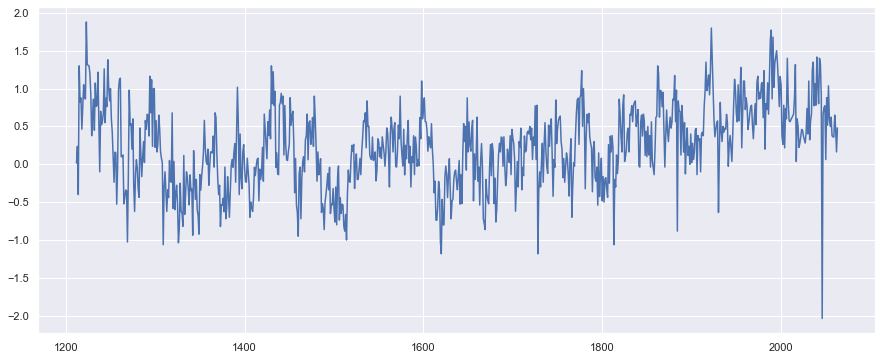

In [41]:
tas2 = cr.variables["tas"][:]
print(tas2[:,0,0].shape)
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))
# Plot the responses for different events and regions
sns.lineplot(x=np.arange(0,2064), y=tas2[:,20,20] ,ax=ax)


In [30]:
print (t)

[]
